In [6]:
import pandas as pd
import numpy as np
import os

file_path_combined = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\BCPLRY\std_bcplry.xlsx"
quarterly = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\BCPLRY\std_quarterly.xlsx"

com_df = pd.read_excel(file_path_combined)
print(com_df.head(2))

qua_df = pd.read_excel(quarterly)
print(qua_df.head(2))

     Date  Equity Share Capital_x  Total Share Capital  Reserves and Surplus  \
0  Mar 05               -0.926011            -0.776261              0.195801   
1  Mar 06               -0.888469            -0.815366              0.454068   

   Total Reserves and Surplus  Total Shareholders Funds  Long Term Borrowings  \
0                    0.189253                  -1.22415             -1.024116   
1                    0.450297                  -0.76685             -0.787025   

   Other Long Term Liabilities  Total Non-Current Liabilities  \
0                     0.000005                      -0.921293   
1                     0.000005                      -0.735723   

   Short Term Borrowings  ...  Earnings Retention Ratio (%)  \
0              -0.581345  ...                      0.507184   
1              -0.502140  ...                      0.623026   

   Cash Earnings Retention Ratio (%)  Enterprise Value (Cr.)  \
0                          -0.121677           -6.283592e-16   
1

In [7]:
from itertools import zip_longest

com_columns = com_df.columns.tolist()
qua_columns = qua_df.columns.tolist()

print(f"{'com_df Columns':<30} {'qua_df Columns':<30}")
print("-" * 60)

for com_col, qua_col in zip_longest(com_columns, qua_columns, fillvalue=""):
    print(f"{com_col:<30} {qua_col:<30}")

com_df Columns                 qua_df Columns                
------------------------------------------------------------
Date                           Quarter                       
Equity Share Capital_x         Net Sales/Income from operations
Total Share Capital            Total Income From Operations  
Reserves and Surplus           Employees Cost                
Total Reserves and Surplus     depreciat                     
Total Shareholders Funds       Other Expenses                
Long Term Borrowings           P/L Before Other Inc. , Int., Excpt. Items & Tax
Other Long Term Liabilities    Other Income                  
Total Non-Current Liabilities  P/L Before Int., Excpt. Items & Tax
Short Term Borrowings          Interest                      
Trade Payables                 P/L Before Exceptional Items & Tax
Other Current Liabilities      Exceptional Items             
Short Term Provisions          P/L Before Tax                
Total Current Liabilities      P/L After T

In [8]:
print(com_df.shape)
print(qua_df.shape)

row = com_df.shape[0] + qua_df.shape[0]
cols = com_df.shape[1] + qua_df.shape[1]
print(row,cols)

(20, 95)
(45, 20)
65 115


In [9]:
# Select only numeric columns
num_df = com_df.select_dtypes(include=[np.number])
qua_num_df = qua_df.select_dtypes(include=[np.number])

# checking for duplicate values in the df
num_duplicates = num_df.T.duplicated(keep=False)
qua_num_duplicates = qua_num_df.T.duplicated(keep=False)

# Print only duplicate column names
print("Duplicate columns in com_df:")
print(num_duplicates[num_duplicates == True])

print("\nDuplicate columns in qua_df:")
print(qua_num_duplicates[qua_num_duplicates == True])

Duplicate columns in com_df:
Total Capital And Liabilities          True
Total Assets                           True
Revenue From Operations [Gross]        True
Revenue From Operations [Net]          True
Basic EPS (Rs.)_x                      True
Diluted EPS (Rs.)_x                    True
Basic EPS (Rs.)_y                      True
Diluted EPS (Rs.)_y                    True
MarketCap/Net Operating Revenue (X)    True
Price/Net Operating Revenue            True
dtype: bool

Duplicate columns in qua_df:
Net Sales/Income from operations    True
Total Income From Operations        True
dtype: bool


In [10]:
com_duplicate_cols = num_duplicates[num_duplicates].index.tolist()
print(com_duplicate_cols)

qua_duplicates_cols = qua_num_duplicates[qua_num_duplicates].index.tolist()
print(qua_duplicates_cols)

['Total Capital And Liabilities', 'Total Assets', 'Revenue From Operations [Gross]', 'Revenue From Operations [Net]', 'Basic EPS (Rs.)_x', 'Diluted EPS (Rs.)_x', 'Basic EPS (Rs.)_y', 'Diluted EPS (Rs.)_y', 'MarketCap/Net Operating Revenue (X)', 'Price/Net Operating Revenue']
['Net Sales/Income from operations', 'Total Income From Operations']


In [11]:
# Ensure the column names are correctly identified
com_duplicate_cols = num_duplicates[num_duplicates].index.tolist()

# List of columns that should NOT be removed
columns_to_keep = ['Total Assets','Revenue From Operations [Net]','Basic EPS (Rs.)_x', 'Diluted EPS (Rs.)_x', 'Basic EPS (Rs.)_y', 'Diluted EPS (Rs.)_y','Price/Net Operating Revenue']

# Drop only the first occurrence of duplicate columns, except for columns in `columns_to_keep`
cols_to_drop = [col for col in com_duplicate_cols if col not in columns_to_keep]
num_df_cleared = num_df.drop(columns=cols_to_drop, errors='ignore')

print("Columns dropped:", cols_to_drop)
print("Remaining columns after cleanup:", num_df_cleared.columns.tolist())

Columns dropped: ['Total Capital And Liabilities', 'Revenue From Operations [Gross]', 'MarketCap/Net Operating Revenue (X)']
Remaining columns after cleanup: ['Equity Share Capital_x', 'Total Share Capital', 'Reserves and Surplus', 'Total Reserves and Surplus', 'Total Shareholders Funds', 'Long Term Borrowings', 'Other Long Term Liabilities', 'Total Non-Current Liabilities', 'Short Term Borrowings', 'Trade Payables', 'Other Current Liabilities', 'Short Term Provisions', 'Total Current Liabilities', 'Tangible Assets', 'Intangible Assets', 'Fixed Assets', 'Non-Current Investments', 'Deferred Tax Assets [Net]', 'Long Term Loans And Advances', 'Other Non-Current Assets', 'Total Non-Current Assets', 'Trade Receivables', 'Cash And Cash Equivalents', 'Short Term Loans And Advances', 'OtherCurrentAssets', 'Total Current Assets', 'Total Assets', 'Contingent Liabilities', 'Expenditure In Foreign Currency', 'Other Earnings', 'Bonus Equity Share Capital', 'Non-Current Investments Unquoted Book Val

In [12]:
qua_df_cleared = qua_num_df.drop(columns=qua_duplicates_cols[0])
print("Columns dropped:- ", qua_df_cleared.columns.tolist())

Columns dropped:-  ['Total Income From Operations', 'Employees Cost', 'depreciat', 'Other Expenses', 'P/L Before Other Inc. , Int., Excpt. Items & Tax', 'Other Income', 'P/L Before Int., Excpt. Items & Tax', 'Interest', 'P/L Before Exceptional Items & Tax', 'Exceptional Items', 'P/L Before Tax', 'P/L After Tax from Ordinary Activities', 'Net Profit/(Loss) For the Period', 'Equity Share Capital', 'Basic EPS', 'Diluted EPS', 'Basic EPS.', 'Diluted EPS.']


In [13]:
print(com_df.shape)
print(qua_df.shape)

row = com_df.shape[0] + qua_df.shape[0]
cols = com_df.shape[1] + qua_df.shape[1]
print(row,cols)

(20, 95)
(45, 20)
65 115


In [14]:
print(num_df_cleared.shape)
print(qua_df_cleared.shape)

row = num_df_cleared.shape[0] + qua_df_cleared.shape[0]
cols = num_df_cleared.shape[1] + qua_df_cleared.shape[1]
print(row,cols)

(20, 91)
(45, 18)
65 109


In [15]:
#Varience Methods
hc_num = num_df_cleared
hc_qua = qua_df_cleared

hc_num_corr_mat = hc_num.corr()
hc_qua_corr_mat = hc_qua.corr()

print(hc_num_corr_mat.columns)
print(hc_qua_corr_mat.columns)

Index(['Equity Share Capital_x', 'Total Share Capital', 'Reserves and Surplus',
       'Total Reserves and Surplus', 'Total Shareholders Funds',
       'Long Term Borrowings', 'Other Long Term Liabilities',
       'Total Non-Current Liabilities', 'Short Term Borrowings',
       'Trade Payables', 'Other Current Liabilities', 'Short Term Provisions',
       'Total Current Liabilities', 'Tangible Assets', 'Intangible Assets',
       'Fixed Assets', 'Non-Current Investments', 'Deferred Tax Assets [Net]',
       'Long Term Loans And Advances', 'Other Non-Current Assets',
       'Total Non-Current Assets', 'Trade Receivables',
       'Cash And Cash Equivalents', 'Short Term Loans And Advances',
       'OtherCurrentAssets', 'Total Current Assets', 'Total Assets',
       'Contingent Liabilities', 'Expenditure In Foreign Currency',
       'Other Earnings', 'Bonus Equity Share Capital',
       'Non-Current Investments Unquoted Book Value',
       'Net Profit/Loss Before Extraordinary Items And T

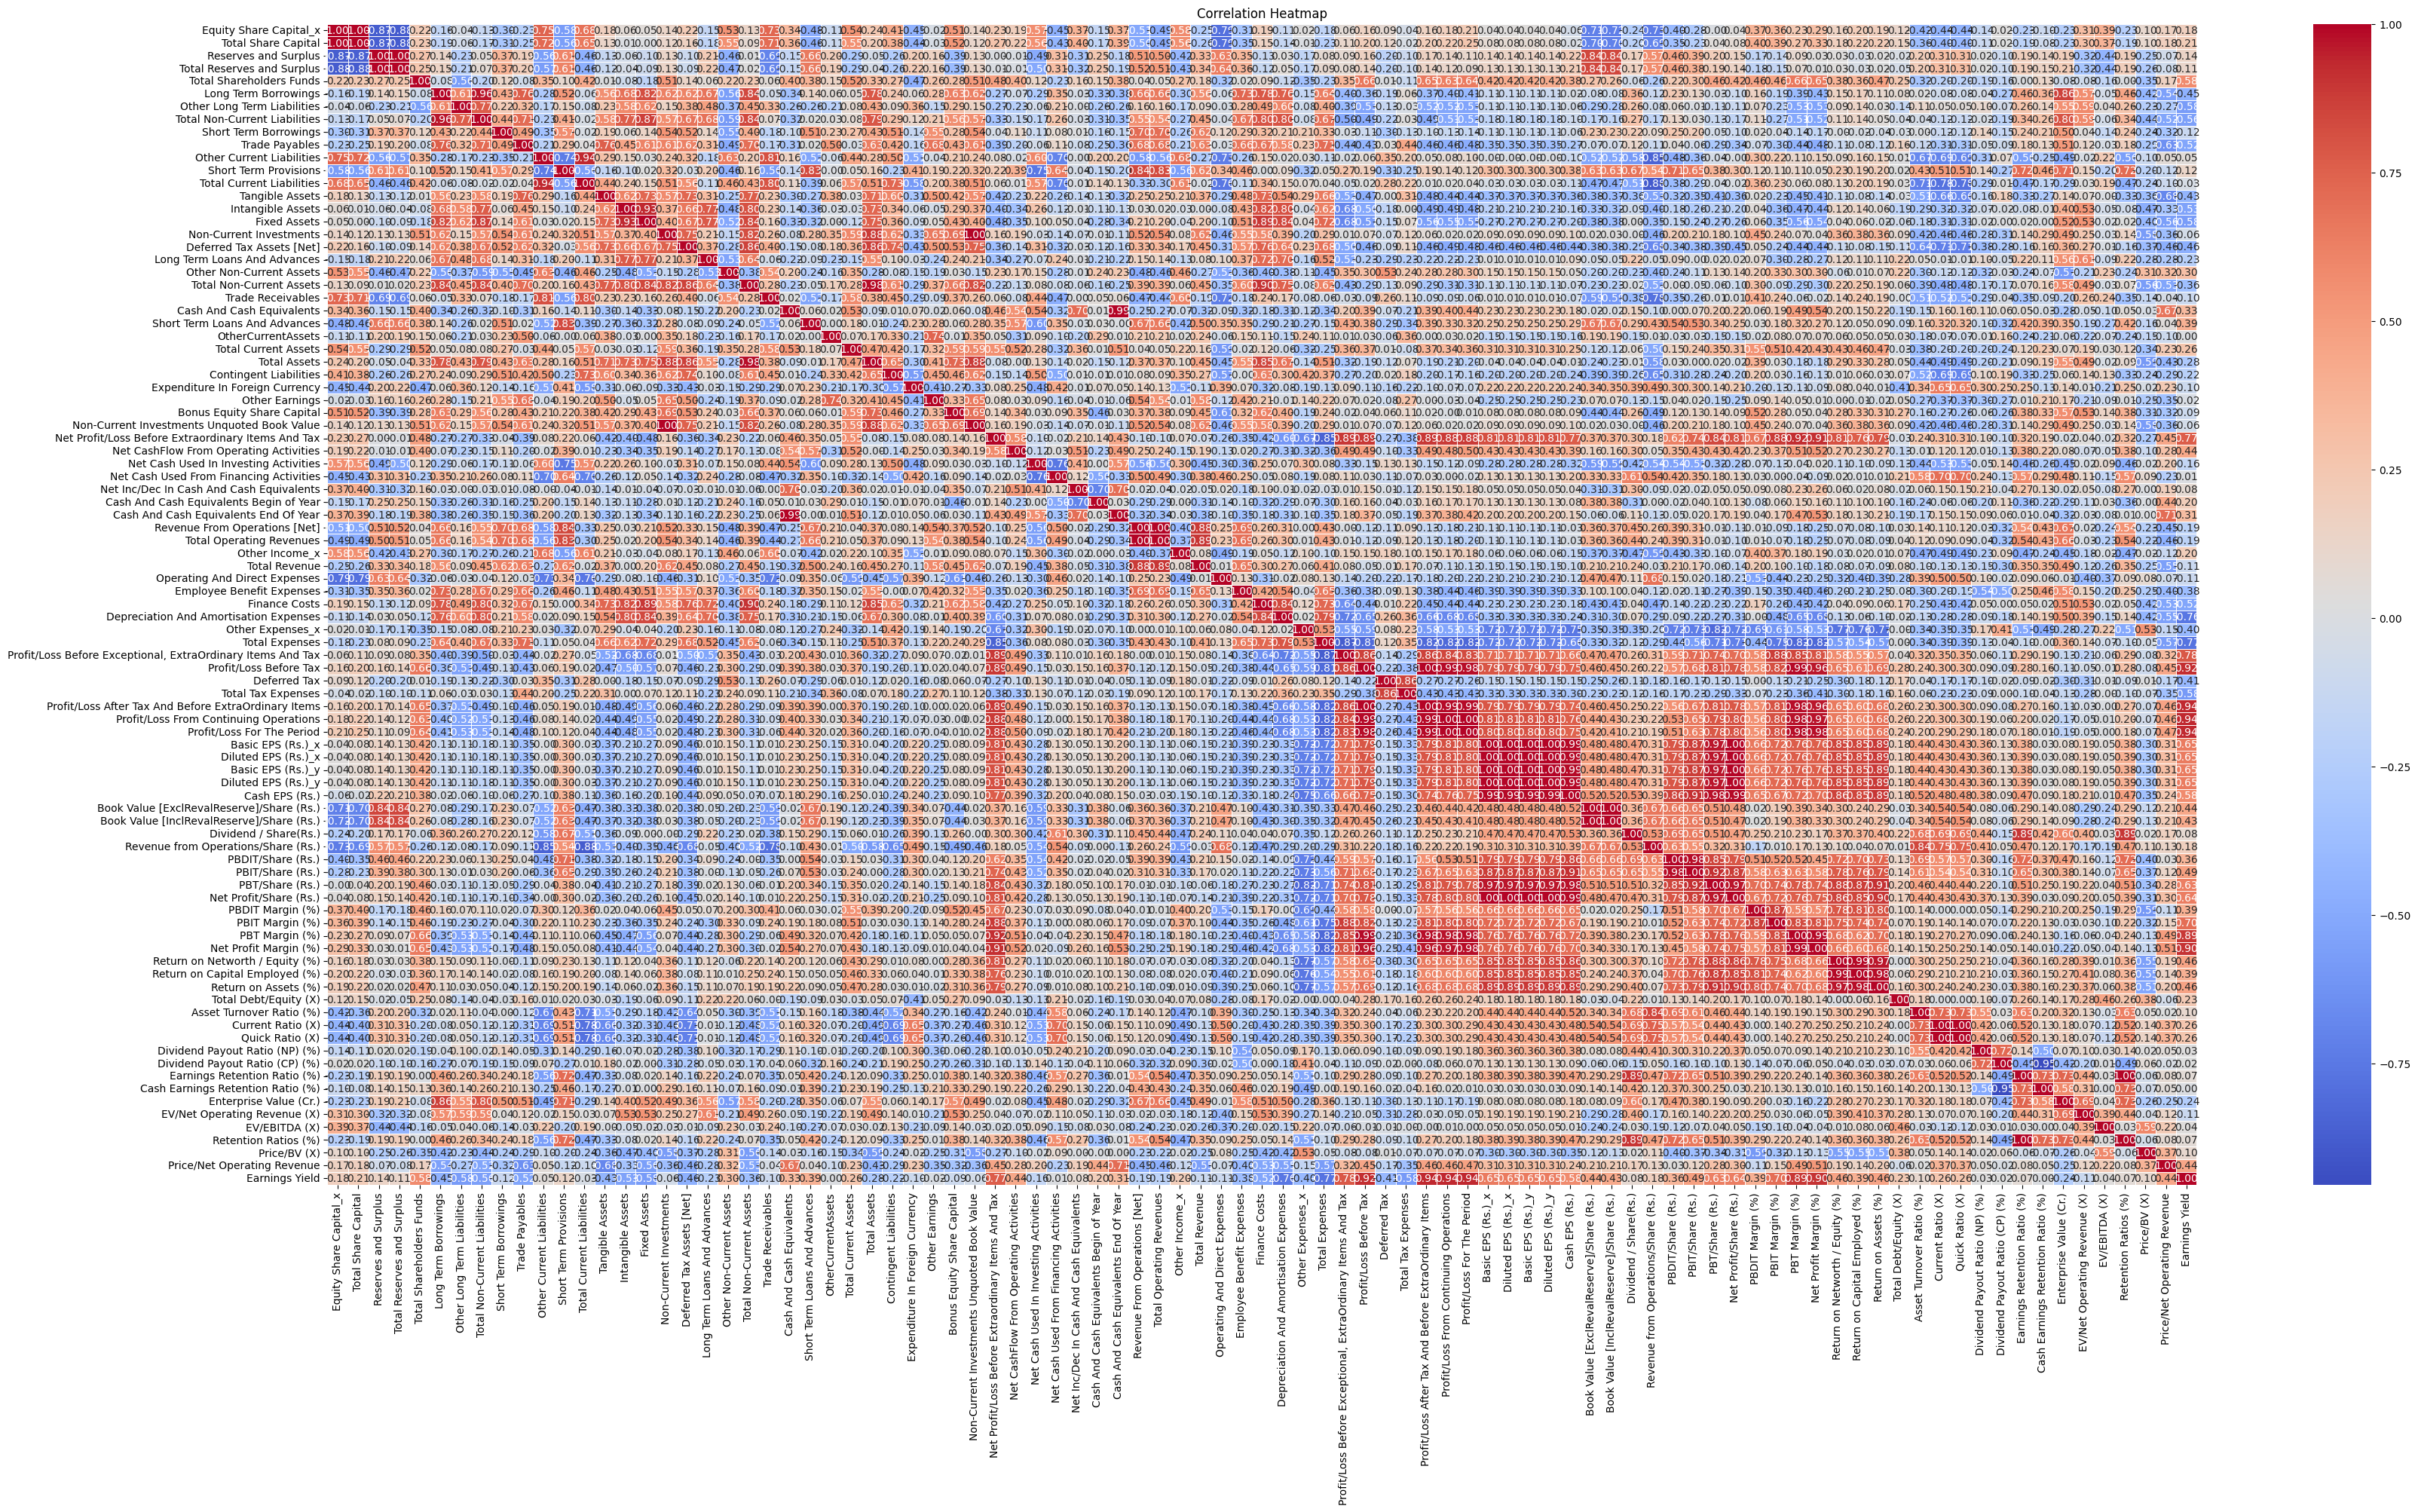


Highly Correlated Features (> 0.8):
('Earnings Yield', 'PBT Margin (%)')
('PBT/Share (Rs.)', 'Profit/Loss Before Tax')
('Net Profit/Share (Rs.)', 'Cash EPS (Rs.)')
('PBIT Margin (%)', 'Net Profit/Loss Before Extraordinary Items And Tax')
('Return on Networth / Equity (%)', 'Net Profit/Loss Before Extraordinary Items And Tax')
('Profit/Loss Before Tax', 'Net Profit/Loss Before Extraordinary Items And Tax')
('Diluted EPS (Rs.)_x', 'Profit/Loss For The Period')
('Return on Capital Employed (%)', 'Basic EPS (Rs.)_y')
('PBT/Share (Rs.)', 'Cash EPS (Rs.)')
('Profit/Loss After Tax And Before ExtraOrdinary Items', 'Profit/Loss Before Exceptional, ExtraOrdinary Items And Tax')
('Return on Networth / Equity (%)', 'Basic EPS (Rs.)_x')
('Net Profit Margin (%)', 'Profit/Loss Before Tax')
('Finance Costs', 'Total Non-Current Assets')
('Return on Assets (%)', 'Cash EPS (Rs.)')
('Non-Current Investments Unquoted Book Value', 'Total Assets')
('Total Current Liabilities', 'Other Current Liabilities')
(

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

hc_num_corr_pairs = set()
hc_qua_corr_pairs = set()
threshold = 0.8

# Visualizing the correlation matrix
plt.figure(figsize=(40, 20))
sns.heatmap(hc_num_corr_mat, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#High Correlation Metrics for num_df
for i in range(len(hc_num_corr_mat.columns)):
    for j in range(i):
        if abs(hc_num_corr_mat.iloc[i, j]) > threshold:
            hc_num_corr_pairs.add((hc_num_corr_mat.columns[i], hc_num_corr_mat.columns[j]))

print("\nHighly Correlated Features (> 0.8):")
for pair in hc_num_corr_pairs:
    print(pair)

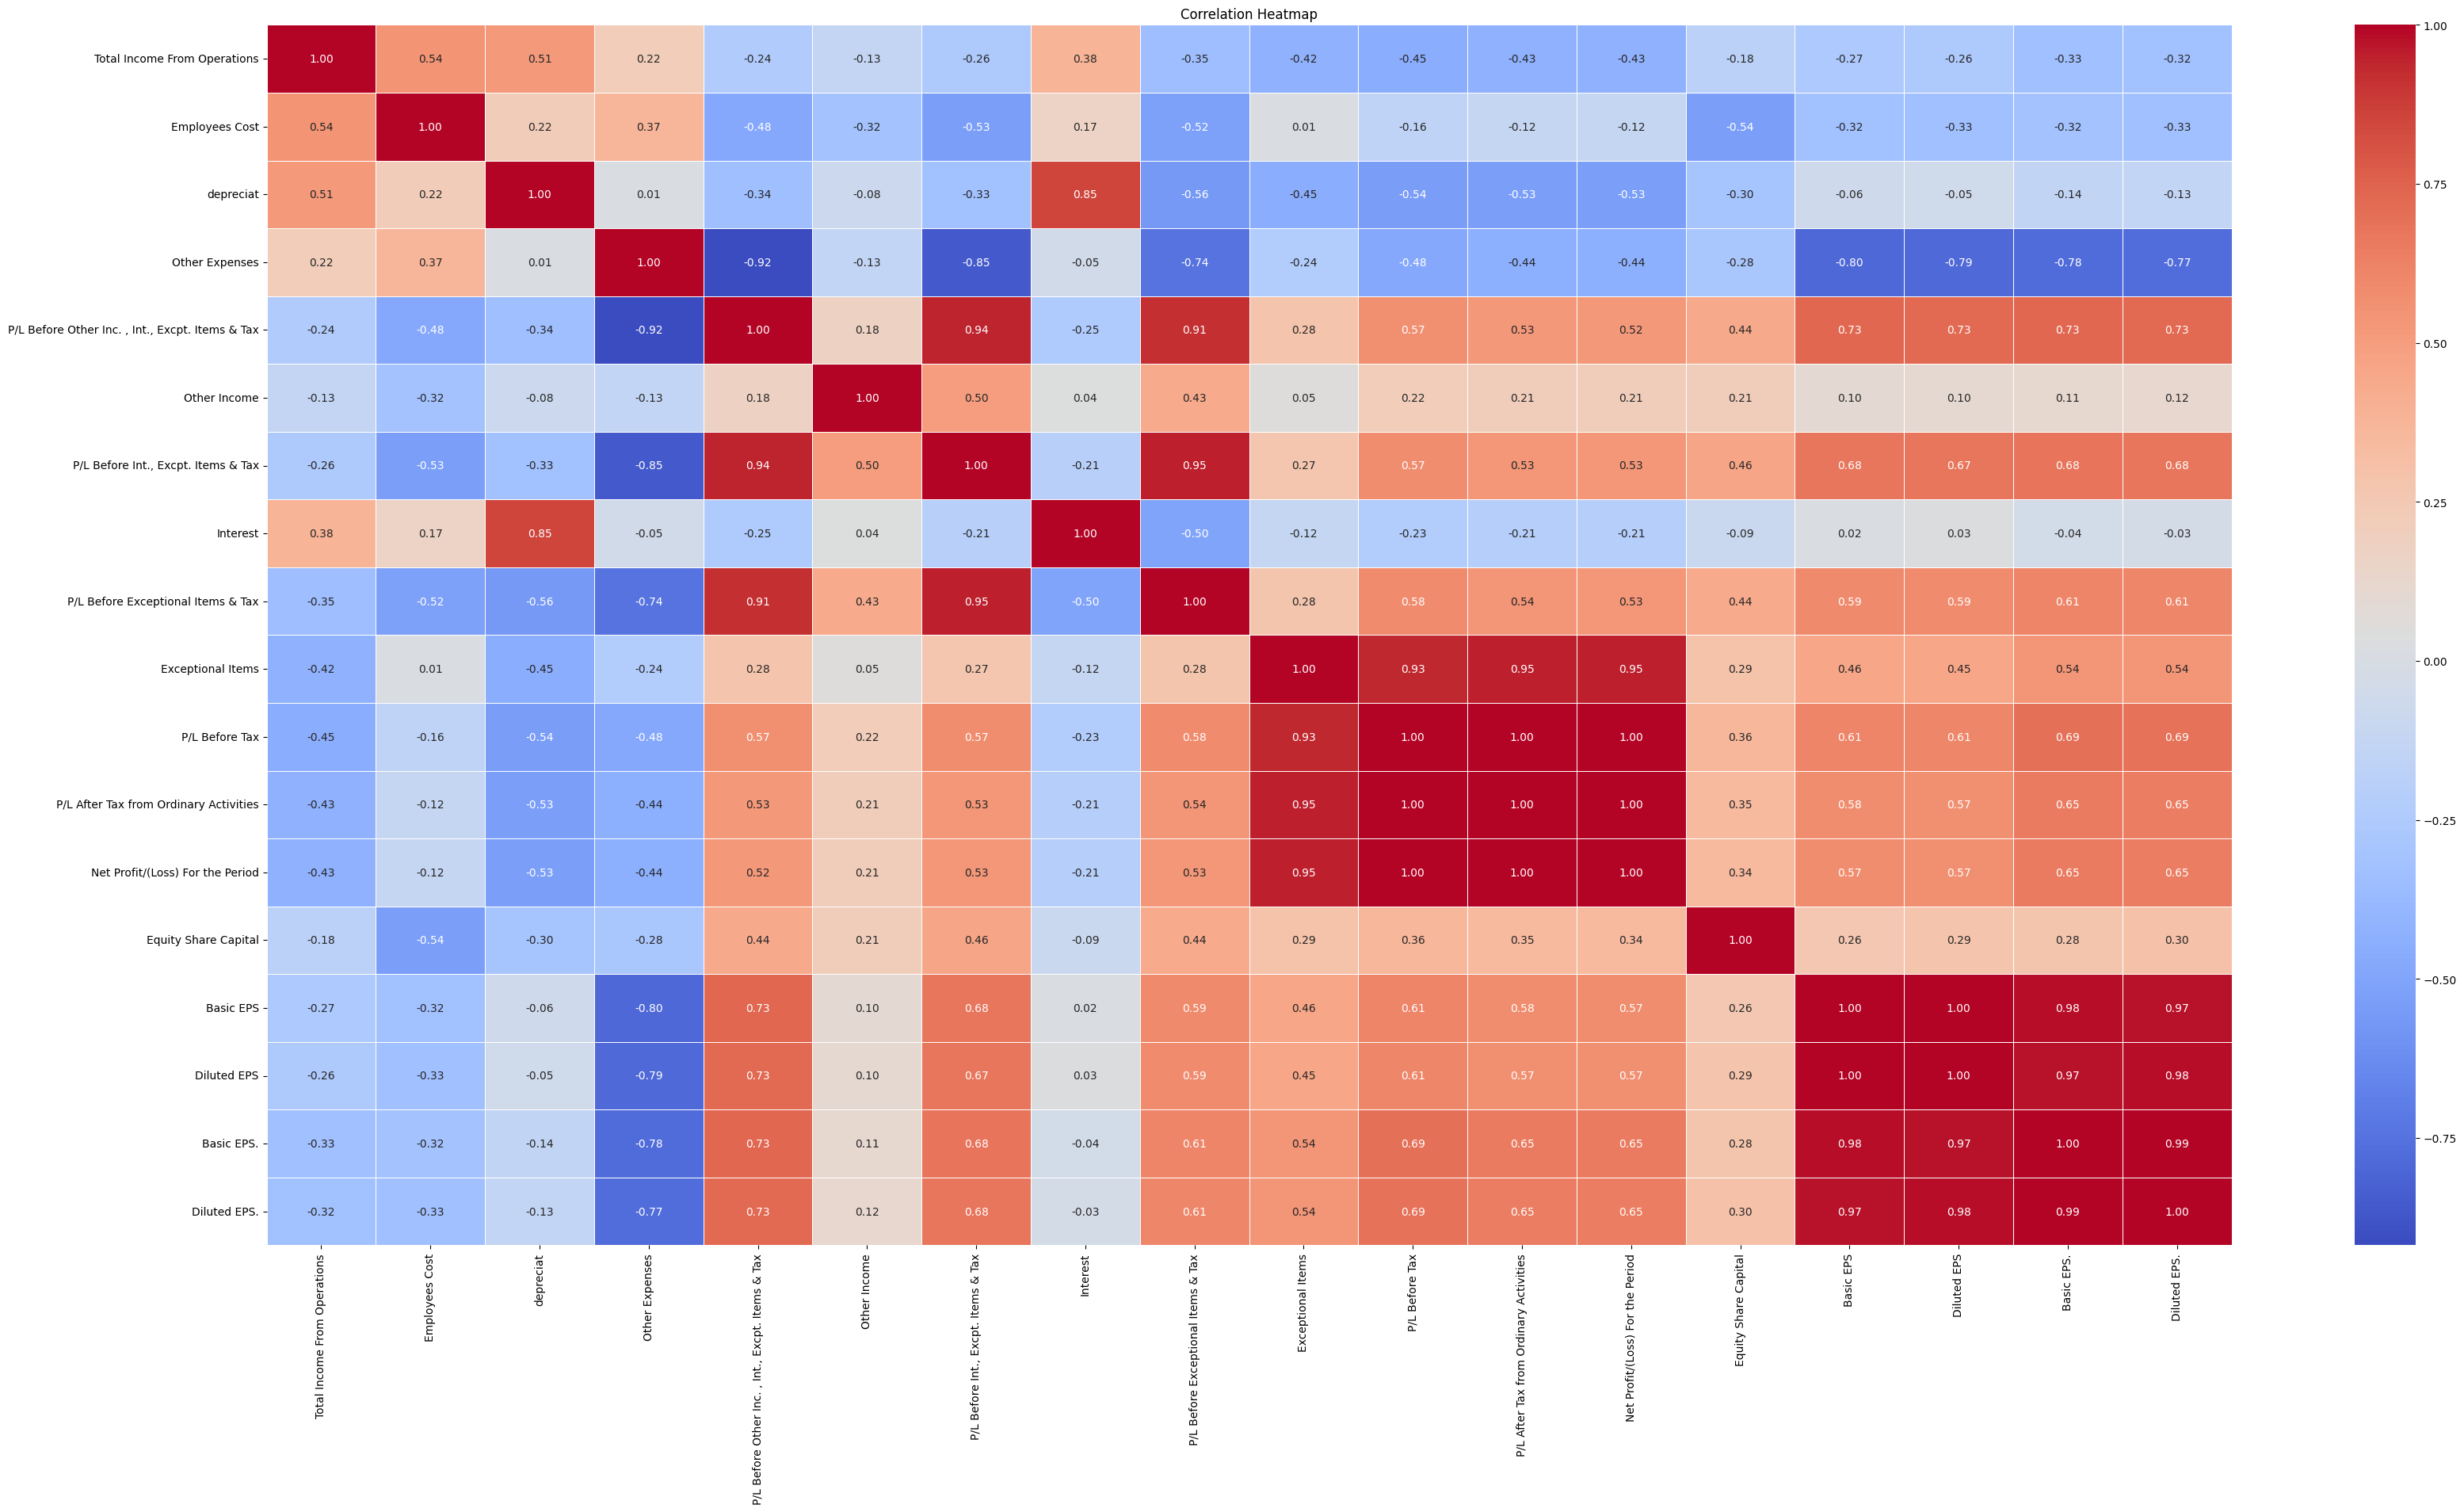


Highly Correlated Features (> 0.8):
('Net Profit/(Loss) For the Period', 'P/L After Tax from Ordinary Activities')
('Diluted EPS.', 'Diluted EPS')
('P/L Before Tax', 'Exceptional Items')
('Diluted EPS', 'Basic EPS')
('P/L After Tax from Ordinary Activities', 'P/L Before Tax')
('P/L Before Exceptional Items & Tax', 'P/L Before Int., Excpt. Items & Tax')
('Net Profit/(Loss) For the Period', 'Exceptional Items')
('Basic EPS.', 'Diluted EPS')
('Diluted EPS.', 'Basic EPS')
('P/L Before Int., Excpt. Items & Tax', 'Other Expenses')
('P/L Before Other Inc. , Int., Excpt. Items & Tax', 'Other Expenses')
('Interest', 'depreciat')
('Net Profit/(Loss) For the Period', 'P/L Before Tax')
('P/L Before Exceptional Items & Tax', 'P/L Before Other Inc. , Int., Excpt. Items & Tax')
('Diluted EPS.', 'Basic EPS.')
('P/L After Tax from Ordinary Activities', 'Exceptional Items')
('P/L Before Int., Excpt. Items & Tax', 'P/L Before Other Inc. , Int., Excpt. Items & Tax')
('Basic EPS.', 'Basic EPS')


In [17]:
plt.figure(figsize=(40, 20))
sns.heatmap(hc_qua_corr_mat, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#High Correlation Metrics for num_df
for i in range(len(hc_qua_corr_mat.columns)):
    for j in range(i):
        if abs(hc_qua_corr_mat.iloc[i, j]) > threshold:
            hc_qua_corr_pairs.add((hc_qua_corr_mat.columns[i], hc_qua_corr_mat.columns[j]))

print("\nHighly Correlated Features (> 0.8):")
for pair in hc_qua_corr_pairs:
    print(pair)

In [18]:
# Drop one of each pair of highly correlated features
hc_num_features_to_drop = set([pair[1] for pair in hc_num_corr_pairs])
hc_qua_features_to_drop = set([pair[1] for pair in hc_qua_corr_pairs])

print(hc_num_features_to_drop)
print(hc_qua_features_to_drop)

{'PBT/Share (Rs.)', 'Total Expenses', 'Diluted EPS (Rs.)_x', 'Basic EPS (Rs.)_y', 'Diluted EPS (Rs.)_y', 'Deferred Tax', 'Deferred Tax Assets [Net]', 'Net Profit/Share (Rs.)', 'Non-Current Investments', 'Total Share Capital', 'PBIT Margin (%)', 'Dividend Payout Ratio (CP) (%)', 'Earnings Retention Ratio (%)', 'Short Term Provisions', 'PBDIT Margin (%)', 'PBT Margin (%)', 'Basic EPS (Rs.)_x', 'Total Reserves and Surplus', 'Net Profit Margin (%)', 'PBIT/Share (Rs.)', 'Total Current Liabilities', 'Finance Costs', 'Profit/Loss From Continuing Operations', 'Current Ratio (X)', 'Total Non-Current Liabilities', 'Revenue from Operations/Share (Rs.)', 'Fixed Assets', 'PBDIT/Share (Rs.)', 'Dividend / Share(Rs.)', 'Other Current Liabilities', 'Profit/Loss Before Exceptional, ExtraOrdinary Items And Tax', 'Long Term Borrowings', 'Other Expenses_x', 'Book Value [ExclRevalReserve]/Share (Rs.)', 'Cash And Cash Equivalents', 'Profit/Loss After Tax And Before ExtraOrdinary Items', 'Net Profit/Loss Befo

In [19]:
num_df_final = num_df_cleared.drop(columns=hc_num_features_to_drop)
qua_df_final = qua_df_cleared.drop(columns=hc_qua_features_to_drop)

print(len(hc_num_features_to_drop))
print(len(hc_qua_features_to_drop))

49
10


In [20]:
print(com_df.shape)
print(qua_df.shape)

row = com_df.shape[0] + qua_df.shape[0]
cols = com_df.shape[1] + qua_df.shape[1]
print(row,cols)

(20, 95)
(45, 20)
65 115


In [21]:
print(num_df_cleared.shape)
print(qua_df_cleared.shape)

row = num_df_cleared.shape[0] + qua_df_cleared.shape[0]
cols = num_df_cleared.shape[1] + qua_df_cleared.shape[1]
print(row,cols)

(20, 91)
(45, 18)
65 109


In [22]:
print(num_df_final.shape)
print(qua_df_final.shape)

row = num_df_final.shape[0] + qua_df_final.shape[0]
cols = num_df_final.shape[1] + qua_df_final.shape[1]
print(row,cols)

(20, 42)
(45, 8)
65 50


In [23]:
# Extract the first column (Dates) from com_df
date_column = com_df.iloc[:, 0]

# Ensure num_df_final has the same number of rows as the date_column
if len(date_column) != len(num_df_final):
    print("Warning: Mismatch in row count between date column and numerical data!")

# Concatenate date column with numerical values
final_df_com = pd.concat([date_column, num_df_final], axis=1)

# Rename the first column to "Date" for clarity
final_df_com.rename(columns={final_df_com.columns[0]: "Year"}, inplace=True)

# Print the first 5 rows of the final combined DataFrame
print(final_df_com.head(5))

final_df_com.to_excel("fe_bscfplry.xlsx",index=False)


     Year  Total Shareholders Funds  Other Long Term Liabilities  \
0  Mar 05                 -1.224150                     0.000005   
1  Mar 06                 -0.766850                     0.000005   
2  Mar 07                 -0.513308                     0.000005   
3  Mar 08                  0.006448                     0.000005   
4  Mar 09                  0.294692                     0.000005   

   Short Term Borrowings  Trade Payables  Tangible Assets  \
0              -0.581345       -0.993640        -1.436988   
1              -0.502140       -1.009591        -1.702424   
2              -0.569611       -0.643312        -1.111257   
3              -0.490657       -0.564739        -1.069097   
4               0.265019        1.056340         0.945585   

   Long Term Loans And Advances  Other Non-Current Assets  Trade Receivables  \
0                      0.000015                 -1.364908          -1.245369   
1                      0.000015                  0.000000       

In [24]:
# Extract the first column (Dates) from com_df
year_column = qua_df.iloc[:, 0]

# Ensure qua_df_final has the same number of rows as the year_column
if len(year_column) != len(qua_df_final):
    print("Warning: Mismatch in row count between date column and numerical data!")

# Concatenate date column with numerical values
final_df_qua = pd.concat([year_column, qua_df_final], axis=1)

# Rename the first column to "Date" for clarity
final_df_qua.rename(columns={final_df_qua.columns[0]: "Year"}, inplace=True)

# Print the first 5 rows of the final combined DataFrame
print(final_df_qua.head(5))

final_df_qua.to_excel("fe_qua.xlsx",index=False)


      Year  Total Income From Operations  Employees Cost  Other Income  \
0  Sep '13                      0.122040        0.613457      0.605997   
1  Dec '13                      0.974631        1.112647     -0.506387   
2  Mar '14                      0.177132        0.852731      0.069652   
3  Jun '14                      1.123784        1.107955     -0.384886   
4  Sep '14                      2.139638        0.980343     -0.447331   

   Interest  P/L Before Exceptional Items & Tax  \
0  2.582354                           -1.124722   
1  3.182389                           -1.762235   
2  2.109472                           -1.195212   
3  1.734508                           -1.260836   
4  1.536353                           -1.189903   

   Net Profit/(Loss) For the Period  Equity Share Capital  Diluted EPS.  
0                         -0.221940             -0.500852     -0.014432  
1                         -0.446973             -0.500852     -0.139525  
2                         

In [29]:
from itertools import zip_longest

final_com_columns = final_df_com.columns.tolist()
final_qua_columns = final_df_qua.columns.tolist()

print(f"{'Final_df_com Columns':<60} {'Final_df_qua Columns':<30}")
print("-" * 90)

for com_col, qua_col in zip_longest(final_com_columns, final_qua_columns, fillvalue=""):
    print(f"{com_col:<60} {qua_col:<30}")

Final_df_com Columns                                         Final_df_qua Columns          
------------------------------------------------------------------------------------------
Year                                                         Year                          
Total Shareholders Funds                                     Total Income From Operations  
Other Long Term Liabilities                                  Employees Cost                
Short Term Borrowings                                        Other Income                  
Trade Payables                                               Interest                      
Tangible Assets                                              P/L Before Exceptional Items & Tax
Long Term Loans And Advances                                 Net Profit/(Loss) For the Period
Other Non-Current Assets                                     Equity Share Capital          
Trade Receivables                                            Diluted EPS.  

In [30]:
from itertools import zip_longest

# Get columns from initial and final DataFrames
com_initial = set(com_df.columns.tolist())
com_final = set(final_df_com.columns.tolist())
qua_initial = set(qua_df.columns.tolist())
qua_final = set(final_df_qua.columns.tolist())

# Find missing (deleted) columns
deleted_com = com_initial - com_final
deleted_qua = qua_initial - qua_final

print(f"{'Deleted from com_df':<60} {'Deleted from qua_df':<30}")
print("-" * 90)

for com_col, qua_col in zip_longest(sorted(deleted_com), sorted(deleted_qua), fillvalue=""):
    print(f"{com_col:<60} {qua_col:<30}")


Deleted from com_df                                          Deleted from qua_df           
------------------------------------------------------------------------------------------
Basic EPS (Rs.)_x                                            Basic EPS                     
Basic EPS (Rs.)_y                                            Basic EPS.                    
Book Value [ExclRevalReserve]/Share (Rs.)                    Diluted EPS                   
Cash And Cash Equivalents                                    Exceptional Items             
Cash EPS (Rs.)                                               Net Sales/Income from operations
Current Ratio (X)                                            Other Expenses                
Date                                                         P/L After Tax from Ordinary Activities
Deferred Tax                                                 P/L Before Int., Excpt. Items & Tax
Deferred Tax Assets [Net]                                    P/L B

In [33]:
print(com_df.columns[1:].tolist())
print(list(deleted_com))

['Equity Share Capital_x', 'Total Share Capital', 'Reserves and Surplus', 'Total Reserves and Surplus', 'Total Shareholders Funds', 'Long Term Borrowings', 'Other Long Term Liabilities', 'Total Non-Current Liabilities', 'Short Term Borrowings', 'Trade Payables', 'Other Current Liabilities', 'Short Term Provisions', 'Total Current Liabilities', 'Total Capital And Liabilities', 'Tangible Assets', 'Intangible Assets', 'Fixed Assets', 'Non-Current Investments', 'Deferred Tax Assets [Net]', 'Long Term Loans And Advances', 'Other Non-Current Assets', 'Total Non-Current Assets', 'Trade Receivables', 'Cash And Cash Equivalents', 'Short Term Loans And Advances', 'OtherCurrentAssets', 'Total Current Assets', 'Total Assets', 'Contingent Liabilities', 'Expenditure In Foreign Currency', 'Other Earnings', 'Bonus Equity Share Capital', 'Non-Current Investments Unquoted Book Value', 'Net Profit/Loss Before Extraordinary Items And Tax', 'Net CashFlow From Operating Activities', 'Net Cash Used In Invest

In [34]:
print(qua_df.columns[1:].tolist())
print(list(deleted_qua))

['Net Sales/Income from operations', 'Total Income From Operations', 'Employees Cost', 'depreciat', 'Other Expenses', 'P/L Before Other Inc. , Int., Excpt. Items & Tax', 'Other Income', 'P/L Before Int., Excpt. Items & Tax', 'Interest', 'P/L Before Exceptional Items & Tax', 'Exceptional Items', 'P/L Before Tax', 'P/L After Tax from Ordinary Activities', 'Net Profit/(Loss) For the Period', 'Equity Share Capital', 'Basic EPS', 'Diluted EPS', 'Basic EPS.', 'Diluted EPS.']
['P/L Before Other Inc. , Int., Excpt. Items & Tax', 'Basic EPS', 'Other Expenses', 'P/L Before Int., Excpt. Items & Tax', 'P/L After Tax from Ordinary Activities', 'Quarter', 'Basic EPS.', 'Net Sales/Income from operations', 'depreciat', 'Diluted EPS', 'P/L Before Tax', 'Exceptional Items']
